In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import linear_model

# Ground Cricket Chirps

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
gcd = pd.DataFrame(ground_cricket_data)

Tasks
1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [3]:
gcd.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


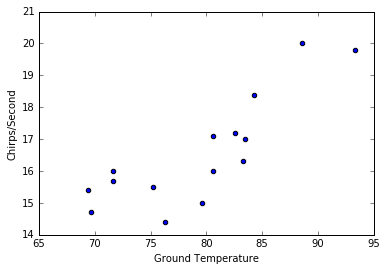

In [4]:
# visualize the relationship between the features(Ground Temperature) and the response (Chirps) using scatterplots
gcd.plot(kind='scatter', x='Ground Temperature', y='Chirps/Second')

View the correlation between Chirps/Second and Ground Temperature

In [5]:
gcd.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [6]:
# pull out the x and y from our data

# input data expects x values on their own separate rows
# use double brackets to keep data in a DataFrame, which meets that requirement
input_data = gcd[['Ground Temperature']]
output_data = gcd['Chirps/Second']

In [7]:
regression = linear_model.LinearRegression()
regression.fit(input_data, output_data)

print(regression.coef_, regression.intercept_)
print(regression.score(input_data, output_data))

[ 0.20299973] 0.459314645236
0.692294652915


/Users/davidmohrmann/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


coefficient = 0.20299973
intercept = 0.459314645236
r^2 score = 0.692294652915

Since the score is less than .8, there is not a good correlation between chirps/second and the ground temperature. 

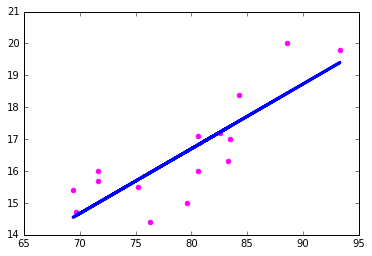

In [8]:
plt.scatter(input_data, output_data, color='magenta')
plt.plot(input_data, regression.predict(input_data), color='blue', linewidth=3)

Extrapolate Data

We need to "predict" the approximate rate of chrips if the temperature is 95.
Manually calculate the prediction:
intercept + coefficient *(predicted value).
regression.predict(x)

In [9]:
0.459314645236 + 0.20299973 *(95) 

19.744288995235998

In [10]:
regression.predict(95)

array([ 19.74428913])

Interpolate Data

Since we are now looking to predict the inverse relationship, it is easier to graph the ground temperature as the feature (y-axis) and chirps/second(x=axis)

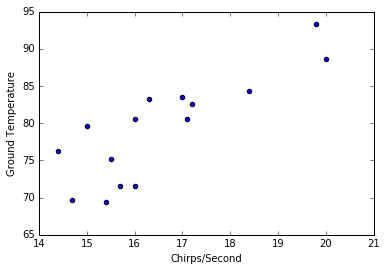

In [11]:
gcd.plot(kind='scatter', x='Chirps/Second', y='Ground Temperature')

In [12]:
gcd.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [13]:
# pull out the x and y from our data

# input data expects x values on their own separate rows
# use double brackets to keep data in a DataFrame, which meets that requirement
input_data = gcd[['Chirps/Second']]
output_data = gcd['Ground Temperature']

In [14]:
regression2 = linear_model.LinearRegression()
regression2.fit(input_data, output_data)

print(regression2.coef_, regression2.intercept_)
print(regression2.score(input_data, output_data))
# the correlation will remain the same; however, the coefficient and the intercept will change because the axises were flipped.

[ 3.410323] 22.8489823081
0.692294652915


coefficient = 3.410323
intercept = 22.8489823081
r^2 score = 0.692294652915

Since the score is less than .8, there is not a good correlation between chirps/second and the ground temperature. 

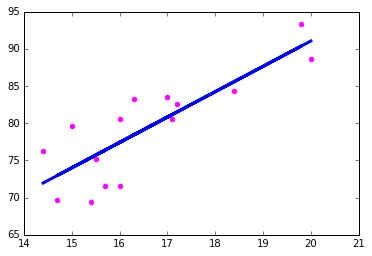

In [15]:
plt.scatter(input_data, output_data, color='magenta')
plt.plot(input_data, regression2.predict(input_data), color='blue', linewidth=3)

We need to "predict" the approximate ground temperature if the chirps/second is 18. 
Manually calculate the prediction: intercept + coefficient *(predicted value)
Use regression.predict()

In [16]:
22.8489823081 + 3.410323 *(18)

84.23479630809999

In [17]:
regression2.predict(18)

array([ 84.2347963])

# Brain vs. Body Weight

In [18]:
bb = pd.read_fwf("brain_body.txt")

Tasks
1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [19]:
bb.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


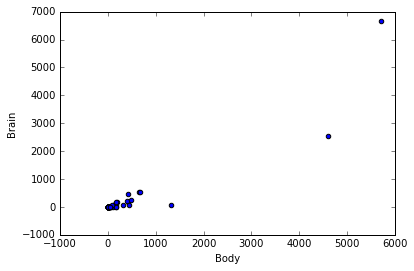

In [20]:
# visualize the relationship between the features(Body) and the response (Brain) using scatterplots
bb.plot(kind='scatter', x='Body', y='Brain')

In [21]:
bb.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [22]:
# pull out the x and y from our data

# input data expects x values on their own separate rows
# use double brackets to keep data in a DataFrame, which meets that requirement
input_data = bb['Brain']
output_data = bb['Body']

In [23]:
regression3 = linear_model.LinearRegression()
regression3.fit(input_data, output_data)

print(regression3.coef_, regression3.intercept_)
print(regression3.score(input_data, output_data))

/Users/davidmohrmann/.direnv/python-3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [ 1 62]

coefficient = 0.90291295
intercept = 22.8489823081
r^2 score = 0.872662084304

Since the score is more than .8, there is a strong correlation between body weight and brain size. 

In [ ]:
plt.scatter(input_data, output_data, color='magenta')
plt.plot(input_data, regression3.predict(input_data), color='blue', linewidth=3)

# Salary Discrimination

In [ ]:
sd = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
sd.head()

In [ ]:
sd.corr()

In [ ]:
sd.plot(kind='scatter', x='Sex', y='Salary')

In [ ]:
list(sd.columns)

In [ ]:
input_data = sd[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]

In [ ]:
output_data = sd['Salary']

In [ ]:
output_data.head()

In [25]:
regression4 = linear_model.LinearRegression()
regression4.fit(input_data, output_data)
print(regression4.coef_, regression4.intercept_)

/Users/davidmohrmann/.direnv/python-3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [ 1 62]

In [ ]:
print(regression4.score(input_data, output_data))

coefficient between sex and salary = 1241.7924996 ; coefficient between rank and salary = 5586.18144952 ; coefficient between tenure year and salary = 482.85976783; coefficient between degree achieved and salary = -1331.64406341 ; coefficient between year since degree and salary = -128.79057354.
Intercept = 11410.1465473
r^2 score between all the inputs and the salary of the individual = 0.854718067441
Since the score is more than .8 for all of the inputs, there is a high correlation between those inputs and salary.

Using the manual prediction, we can show the prediction for a woman's base salary based only on her sex:
intercept + coefficient *(predicted value)

In [ ]:
11410.1465473 + 1241.7924996*(0)

Using the manual prediction, we can show the prediction for a man's base salary based only on her sex:


In [ ]:
11410.1465473 + 1241.7924996*(1)

A difference of $1241.79. 

In [ ]:
# ax = sd.plot.scatter(x='YSdeg', y='Salary', color='Black', label='Group 1');
# sd.plot.scatter(x='Rank', y='Salary', color='Red', label='Group 2', ax=ax);
# sd.plot.scatter(x='Year', y='Salary', color='Blue', label='Group 3', ax=ax);
# sd.plot.scatter(x='Degree', y='Salary', color='Yellow', label='Group 4', ax=ax)
# sd.plot.scatter(x='Sex', y='Salary', color='LightBlue', label='Group 5', ax=ax)